In [1]:
# from pgmpy.models import BayesianModel
import networkx as nx

In [5]:
# camel_model = BayesianModel([('country','paycount'),
#                             ('platform', 'paycount'),
#                             ('paycount','arpu'),
#                             ('arpu','total_amount'),
#                             ('paycount', 'total_amount')])

In [19]:
300000 * 300

90000000

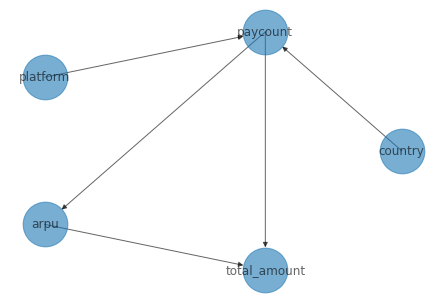

In [14]:
G = nx.from_edgelist([('country','paycount'),
                      ('platform', 'paycount'),
                      ('paycount','arpu'),
                      ('arpu','total_amount'),
                      ('paycount', 'total_amount')],
                     create_using=nx.DiGraph)

pos = nx.shell_layout(G)
nx.draw(G, with_labels = 'True', node_size = 2000, alpha = 0.6, pos = pos)

In [2]:
cancer_model = BayesianModel([('Pollution', 'Cancer'),
                              ('Smoker', 'Cancer'),
                              ('Cancer', 'Xray'),
                              ('Cancer', 'Dyspnoea')])

In [3]:
from pgmpy.factors.discrete import TabularCPD

cpd_poll = TabularCPD(variable='Pollution', variable_card=2,
                      values=[[0.9], [0.1]])
cpd_smoke = TabularCPD(variable='Smoker', variable_card=2,
                       values=[[0.3], [0.7]])
cpd_cancer = TabularCPD(variable='Cancer', variable_card=2,
                        values=[[0.03, 0.05, 0.001, 0.02],
                                [0.97, 0.95, 0.999, 0.98]],
                        evidence=['Smoker', 'Pollution'],
                        evidence_card=[2, 2])
cpd_xray = TabularCPD(variable='Xray', variable_card=2,
                      values=[[0.9, 0.2], [0.1, 0.8]],
                      evidence=['Cancer'], evidence_card=[2])
cpd_dysp = TabularCPD(variable='Dyspnoea', variable_card=2,
                      values=[[0.65, 0.3], [0.35, 0.7]],
                      evidence=['Cancer'], evidence_card=[2])

In [4]:
# Associating the parameters with the model structure.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)

# Checking if the cpds are valid for the model.
cancer_model.check_model()

True

In [5]:
# Check for d-separation between variables
print(cancer_model.is_active_trail('Pollution', 'Smoker'))
print(cancer_model.is_active_trail('Pollution', 'Smoker', observed=['Cancer']))

False
True


In [6]:
cancer_model.active_trail_nodes('Pollution')

{'Pollution': {'Cancer', 'Dyspnoea', 'Pollution', 'Xray'}}

In [7]:
cancer_model.local_independencies('Xray')

(Xray _|_ Dyspnoea, Pollution, Smoker | Cancer)

In [8]:
cancer_model.get_independencies()

(Pollution _|_ Smoker)
(Pollution _|_ Xray, Dyspnoea | Cancer)
(Pollution _|_ Dyspnoea | Cancer, Xray)
(Pollution _|_ Xray | Cancer, Dyspnoea)
(Pollution _|_ Xray, Dyspnoea | Cancer, Smoker)
(Pollution _|_ Dyspnoea | Cancer, Xray, Smoker)
(Pollution _|_ Xray | Cancer, Dyspnoea, Smoker)
(Smoker _|_ Pollution)
(Smoker _|_ Xray, Dyspnoea | Cancer)
(Smoker _|_ Dyspnoea | Cancer, Xray)
(Smoker _|_ Xray | Cancer, Dyspnoea)
(Smoker _|_ Xray, Dyspnoea | Cancer, Pollution)
(Smoker _|_ Dyspnoea | Cancer, Xray, Pollution)
(Smoker _|_ Xray | Cancer, Dyspnoea, Pollution)
(Xray _|_ Dyspnoea, Pollution, Smoker | Cancer)
(Xray _|_ Pollution, Smoker | Cancer, Dyspnoea)
(Xray _|_ Dyspnoea, Smoker | Cancer, Pollution)
(Xray _|_ Dyspnoea, Pollution | Cancer, Smoker)
(Xray _|_ Smoker | Cancer, Dyspnoea, Pollution)
(Xray _|_ Pollution | Cancer, Dyspnoea, Smoker)
(Xray _|_ Dyspnoea | Smoker, Cancer, Pollution)
(Dyspnoea _|_ Xray, Pollution, Smoker | Cancer)
(Dyspnoea _|_ Pollution, Smoker | Cancer, Xray)
(Dy

In [194]:
import numpy as np
import matplotlib.pyplot as plt
def sensitivity(variales, scales, dependent = 'arppu'):
    
    varanmes = ['login','payrate','arppu']
    independent = list(filter(lambda x:x!=dependent, varanmes))


    grid = [[var0, var1, var0 * var1] 
            for var0 in variables[independent[0]] 
            for var1 in variables[independent[1]]]

    grid = pd.DataFrame(grid, columns = independent + [dependent])
    grid[dependent] = grid[dependent] * scales[dependent]
    grid = grid.pivot(index = independent[0], columns = independent[1], values = dependent)
    sns.heatmap(grid)
    plt.show()


In [204]:
login = np.linspace(10000, 80000, 101)[:-1]
payrate = np.linspace(0, .05, 101)[:-1].round(4)
arppu = np.linspace(10,310,101)[:-1]

variables = dict(login = login, payrate = payrate, arppu = arppu)
scales = dict(login = 10, payrate = 0.005, arppu = 10)


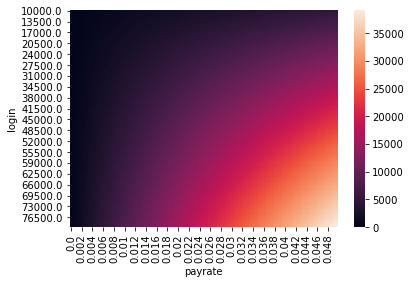

In [202]:
sensitivity(variables, scales, 'arppu')

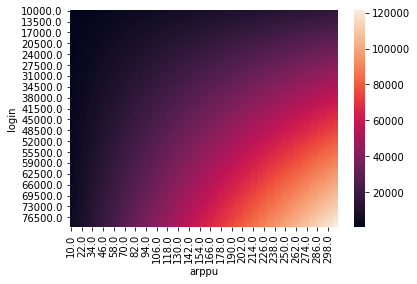

In [205]:
sensitivity(variables, scales, 'payrate')